In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from localize import PolarFinder, FIND_IRIS, POLAR_GRADIENT
from filtering import SimpleMedian
from fitting import fitCircleLS

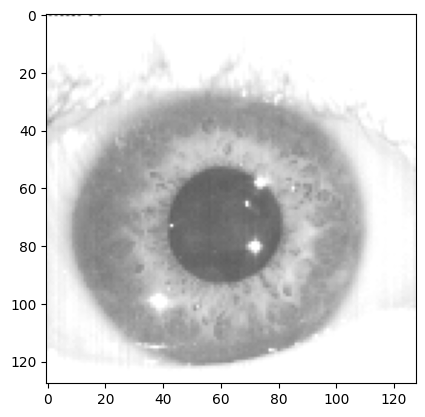

In [10]:
eye_image = cv2.imread("eye_img.png", cv2.IMREAD_GRAYSCALE)
eye_image = eye_image[:,:eye_image.shape[1]//2]

plt.imshow(eye_image, cmap='gray', vmin=0, vmax=255)
plt.show()

In [15]:
iris_finder = PolarFinder(FIND_IRIS, (0, 0), peaks_find_method=POLAR_GRADIENT, filter_model=SimpleMedian(1), fitting_method=fitCircleLS)

In [16]:
center, radius = iris_finder.find(eye_image)

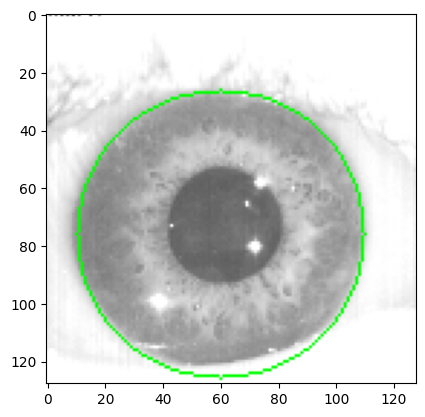

In [22]:
color_copy = cv2.cvtColor(eye_image, cv2.COLOR_GRAY2BGR)

cv2.circle(color_copy, np.round(center).astype(int), round(radius), (0, 255, 0))

plt.imshow(color_copy, cmap='gray', vmin=0, vmax=255)
plt.show()

In [23]:
iris_finder_ellispe = PolarFinder(FIND_IRIS, (0, 0), peaks_find_method=POLAR_GRADIENT, filter_model=SimpleMedian(1), fitting_method=cv2.fitEllipse)

In [26]:
ellipse = iris_finder_ellispe.find(eye_image)

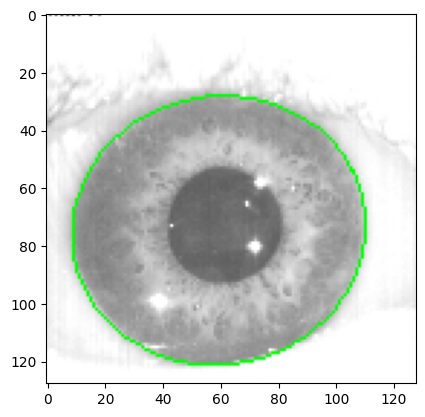

In [27]:
color_copy = cv2.cvtColor(eye_image, cv2.COLOR_GRAY2BGR)

cv2.ellipse(color_copy, ellipse, (0, 255, 0))

plt.imshow(color_copy, cmap='gray', vmin=0, vmax=255)
plt.show()